**Реализовать алгоритм обратного dropout для задачи классификации MNIST из предыдущего задания (для двух видов градиентного спуска):**

На этапе обучения сети (прямое распространение):

  1. генерируете случайную маску из нулей и единиц для слоя layer_1 с вероятностью p=0.5(можно использовать np.random.randint), либо найдите функцию для распределения Бернулли (биномиальное распределение)
  2. Умножаете выход слоя layer_1 на маску
  3. Умножаете  результат в пункте 2 на 1/(1-p)

  4. учесть применение слоя дропаут при обратном распространении сети


  На этапе тестирования сети:

  5. Обычное прямое распространение без dropout. Все как и раньше.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive # Использование Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/MNIST/mnist_train.csv') # Загрузка данных из Google Drive
data_test = pd.read_csv('/content/drive/MyDrive/MNIST/mnist_test.csv')

In [ ]:
data_train = data_train[:2000] # Ограничение датасета
data_test = data_test[:400]

In [ ]:
data_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


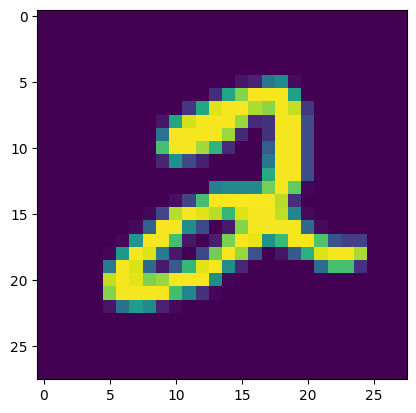

In [ ]:
img = np.reshape(list(data_train.iloc[5][1:785]), (28, 28))
plt.imshow(img)

In [ ]:
data_train.to_numpy()

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_train_copy = data_train.copy() # Берем данные без меток
data_test_copy = data_test.copy()
del data_train_copy['label']
X_train = data_train_copy
del data_test_copy['label']
X_test = data_test_copy
del data_train_copy
del data_test_copy
X_train.shape, X_test.shape

((2000, 784), (400, 784))

In [ ]:
X_train /= 255 # Нормировка
X_test /= 255

In [ ]:
encoding = OneHotEncoder(sparse_output=False, handle_unknown='error') # Кодирование меток
labels = pd.concat([data_train[['label']], data_test[['label']]])
encoding.fit(labels)
y_train = pd.DataFrame(encoding.transform(data_train[['label']]))
y_test = pd.DataFrame(encoding.fit_transform(data_test[['label']]))
y_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test = X_test.to_numpy() # Преобразование в массив
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()

NameError: ignored

In [ ]:
def relu(x): # Функция активации
    return (x > 0) * x

def relu_two_deriv(x): # Производная функции активации
    return x>0

def model_prediction(input, weights_0_1, weights_1_2): # Модель прдсказания трехслойной системы
  layer_0 = input
  layer_1 = relu(np.dot(layer_0,weights_0_1))
  layer_2 = np.dot(layer_1,weights_1_2)
  return layer_2

In [ ]:
def relu(x): # Функция активации
    return (x > 0) * x

def relu_two_deriv(x): # Производная функции активации
    return x>0

def model_prediction(input, weights_0_1, weights_1_2): # Модель прдсказания трехслойной системы
  layer_0 = input
  layer_1 = relu(np.dot(layer_0,weights_0_1))
  layer_2 = np.dot(layer_1,weights_1_2)
  return layer_2

np.random.seed(1)

learning_rate = 0.005
hidden_size = 100
input_size = 784
num_labels = 10
dropout_ratio = 0.5
EPOCHS = 6

weights_input_hidden = (2*np.random.random((input_size,hidden_size)) - 1) / np.sqrt(input_size) # Веса между входным и скрытым слоями
weights_hidden_output = (2*np.random.random((hidden_size, num_labels)) - 1) / np.sqrt(hidden_size) # Веса между скрытым и выходным слоями

array_iteration = []
array_error = []
array_accuracy = []


for iteration in range(EPOCHS):
   error = 0
   for i in range(len(X_train)):
     # Прямой проход
     input_layer = X_train[i:i+1]
     hidden_layer = relu(np.dot(input_layer,weights_input_hidden))
     mask = np.random.binomial(size=hidden_layer.shape, n=1, p=dropout_ratio) # Биноминальное распределение
     hidden_layer = hidden_layer * mask # Умножение на маску
     hidden_layer = hidden_layer * 1/(1 - dropout_ratio) # 1/1-p для dropout
     output_layer = np.dot(hidden_layer,weights_hidden_output)

     error+= np.sum((output_layer - y_train[i:i+1]) ** 2)

     # Обратный проход
     diff_between_output_hidden = 2*(output_layer - y_train[i:i+1])
     weight_hidden_output_corrections = hidden_layer.T.dot(diff_between_output_hidden) # Величина коррекции для весов между layer_1 и layer_2

     diff_between_hidden_input = diff_between_output_hidden.dot(weights_hidden_output.T)*relu_two_deriv(hidden_layer)
     diff_between_hidden_input = diff_between_hidden_input*mask
     diff_between_hidden_input = diff_between_hidden_input * 1/(1 - dropout_ratio) # 1/1-p для dropout
     weight_input_hidden_corrections = input_layer.T.dot(diff_between_hidden_input)

     weights_hidden_output = weights_hidden_output - learning_rate * weight_hidden_output_corrections
     weights_input_hidden = weights_input_hidden - learning_rate * weight_input_hidden_corrections

   if(iteration % 1 == 0):
      print("Error:", str(error))
      array_iteration.append(iteration)
      array_error.append(error)
      goal_idx = np.argmax(y_train[:100], axis=1)
      y_prediction = model_prediction(X_train[:100], weights_input_hidden, weights_hidden_output)
      pred_idx = np.argmax(y_prediction, axis=1)
      accuracy = accuracy_score(goal_idx ,pred_idx)
      array_accuracy.append(accuracy)
      print("Acc:", str(accuracy))

Error: 1192.0931040286493
Acc: 0.92
Error: 836.1668494038832
Acc: 0.92
Error: 732.9523777518157
Acc: 0.93
Error: 682.6328681565055
Acc: 0.96
Error: 641.4520487549083
Acc: 0.95
Error: 639.0254277791939
Acc: 0.95


In [ ]:
learning_rate = 0.005
hidden_size = 100
input_size = 784
num_labels = 10
batch_size = 32
n_iterations = len(X_train) // batch_size
epochs  = 16
dropout_ratio = 0.5

weights_input_hidden_batch = (2*np.random.random((input_size,hidden_size)) - 1) / np.sqrt(input_size) # Веса между входным и скрытым слоями
weights_hidden_output_batch = (2*np.random.random((hidden_size, num_labels)) - 1) / np.sqrt(hidden_size) # Веса между скрытым и выходным слоями

array_iteration_batch = []
array_error_batch = []
array_accuracy_batch = []


for epoch in range(epochs):
   error = 0
   for i in range(n_iterations):
     # Прямой проход
     input_layer_batch = X_train[i * batch_size:(i+1) * batch_size]
     hidden_layer_batch = relu(np.dot(input_layer_batch, weights_input_hidden_batch))
     mask = np.random.binomial(size=hidden_layer_batch.shape, n=1, p=dropout_ratio) # Биноминальное распределение
     hidden_layer_batch = hidden_layer_batch * mask # Умножение на маску
     hidden_layer_batch *= 1/(1 - dropout_ratio) # 1/1-p для dropout
     output_layer_batch = np.dot(hidden_layer_batch, weights_hidden_output_batch)

     error += np.mean((output_layer_batch - y_train[i * batch_size:(i+1) * batch_size]) ** 2)

     # Обратный проход
     diff_between_output_hidden_batch = 2*(output_layer_batch - y_train[i * batch_size:(i+1) * batch_size])
     weight_output_hidden_batch_corrections = hidden_layer_batch.T.dot(diff_between_output_hidden_batch) # Величина коррекции для весов между layer_1 и layer_2

     diff_between_hidden_input_batch = diff_between_output_hidden_batch.dot(weights_hidden_output_batch.T)*relu_two_deriv(hidden_layer_batch)
     diff_between_hidden_input_batch = diff_between_hidden_input_batch*mask
     diff_between_hidden_input_batch = diff_between_hidden_input_batch * 1/(1 - dropout_ratio) # 1/1-p для dropout
     weight_hidden_input_batch_corrections = input_layer_batch.T.dot(diff_between_hidden_input_batch)

     weights_hidden_output_batch = weights_hidden_output_batch - learning_rate * weight_output_hidden_batch_corrections
     weights_input_hidden_batch = weights_input_hidden_batch - learning_rate * weight_hidden_input_batch_corrections

   if(epoch % 1 == 0):
      print("Error:", error / n_iterations) # Среднее значение ошибки
      array_iteration_batch.append(epoch)
      array_error_batch.append(error)
      goal_idx = np.argmax(y_train[:100], axis=1)
      y_pred = model_prediction(X_train[:100], weights_input_hidden_batch, weights_hidden_output_batch)
      pred_idx = np.argmax(y_pred, axis=1)
      accuracy = accuracy_score(goal_idx ,pred_idx)
      array_accuracy_batch.append(accuracy)
      print("Acc:", str(accuracy))

Error: 0.06697909218469265
Acc: 0.87
Error: 0.046072530166202316
Acc: 0.89
Error: 0.040229422628325566
Acc: 0.9
Error: 0.03718014839583395
Acc: 0.92
Error: 0.034100847739166086
Acc: 0.94
Error: 0.033263592908724895
Acc: 0.93
Error: 0.0321146440206899
Acc: 0.94
Error: 0.03018552403662814
Acc: 0.96
Error: 0.03061426722029538
Acc: 0.96
Error: 0.02976933999703838
Acc: 0.95
Error: 0.02858115437344635
Acc: 0.95
Error: 0.028880813421192416
Acc: 0.95
Error: 0.028195354439053986
Acc: 0.95
Error: 0.027444418175579452
Acc: 0.94
Error: 0.027109759000100618
Acc: 0.97
Error: 0.02797389706039975
Acc: 0.96


Постройте графики функции потерь и accuracy для двух выборок.

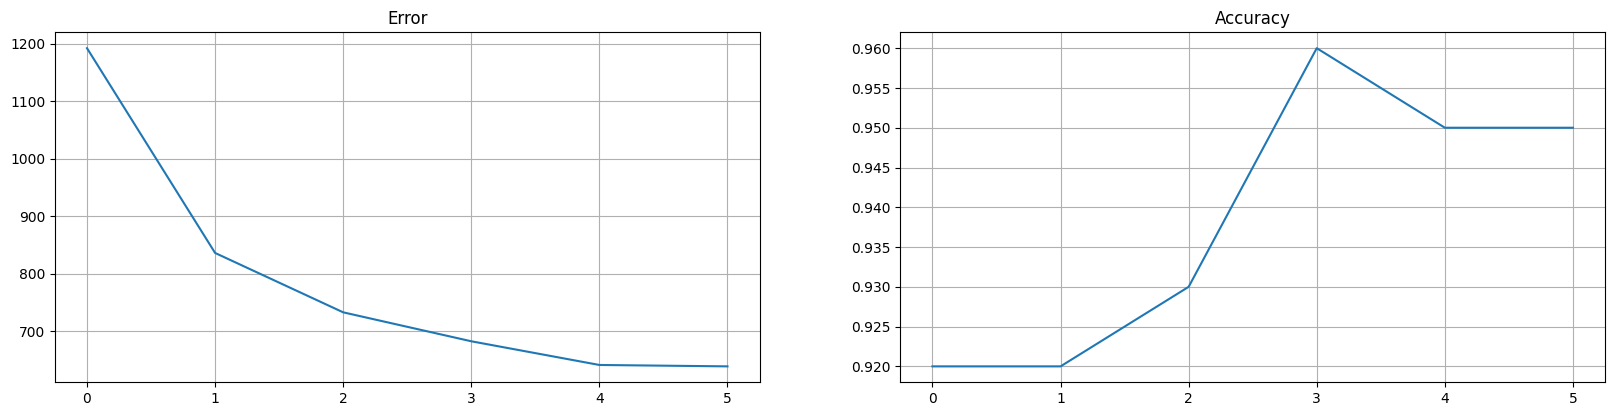

In [ ]:
graph = plt.figure(figsize=(20, 10), constrained_layout=False) # Стохастический градиентный спуск

error_range = np.linspace(0.18, 0)

subgraph_1 = graph.add_subplot(221)
subgraph_1.plot(array_iteration, array_error)
subgraph_1.set_title('Error')
plt.grid()

subgraph_2 = graph.add_subplot(222)
subgraph_2.plot(array_iteration, array_accuracy)
subgraph_2.set_title('Accuracy')
plt.grid()

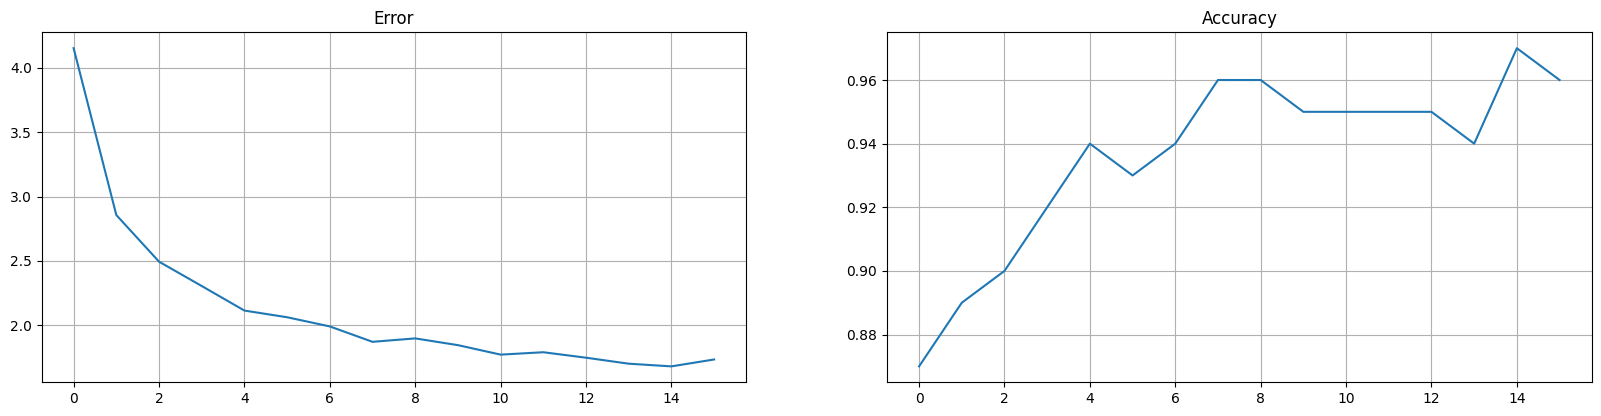

In [ ]:
graph_batch = plt.figure(figsize=(20, 10), constrained_layout=False) # Пакетный градиентный спуск

error_range = np.linspace(0.15, 0)

subgraph_batch_1 = graph_batch.add_subplot(221)
subgraph_batch_1.plot(array_iteration_batch, array_error_batch)
subgraph_batch_1.set_title('Error')
plt.grid()

subgraph_batch_2 = graph_batch.add_subplot(222)
subgraph_batch_2.plot(array_iteration_batch, array_accuracy_batch)
subgraph_batch_2.set_title('Accuracy')
plt.grid()

Можно ли поставить слой дропаут после выходного слоя?

Можно , вот пример: <i>То есть, мы записываем Dropout после слоя, к которому он применяется. Теперь после обучения у нас возникает следующая картина:
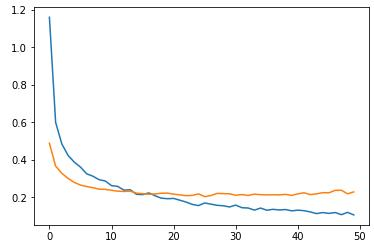

Смотрите, здесь качество обучения на проверочной выборке уже не ухудшается и составляет величину, примерно, 0,22. Тогда как в предыдущем случае она почти достигала значения 0,3. Dropout здесь явно сыграл свою положительную роль.

Конечно, это довольно искусственный, гипертрофированный пример, но он наглядно демонстрирует эффект уменьшения степени специализации отдельных нейронов и повышения качества обучения при сохранении общего числа нейронов сети.